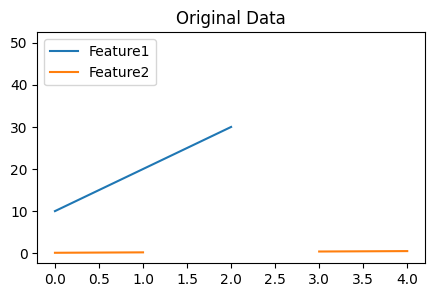

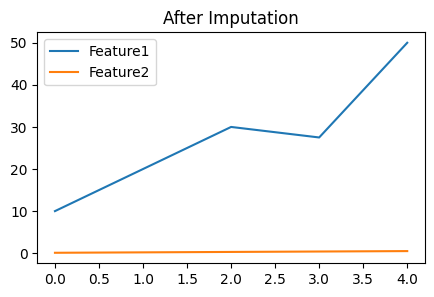

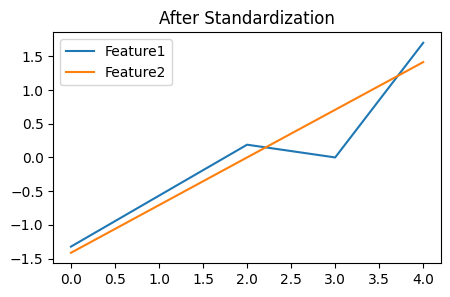

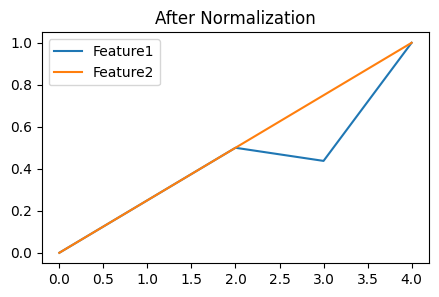

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Sample DataFrame with numerical data
data = {
    'Feature1': [10, 20, 30, None, 50],
    'Feature2': [0.1, 0.2, None, 0.4, 0.5],
    'Feature3': [70, 80, 90, 46, 56]
}
df = pd.DataFrame(data)

# Function to plot data
def plot_data(X, title):
    plt.figure(figsize=(5, 3))
    for col in X.columns:
        plt.plot(X[col], label=col)
    plt.title(title)
    plt.legend()
    plt.show()

# Define preprocessing steps
def preprocess_data(df):
    # Split into features and target if needed
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    plot_data(X, "Original Data")

    # Handling missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
    plot_data(X_imputed_df, "After Imputation")

    # Scaling features: Standardization
    scaler_std = StandardScaler()
    X_scaled = scaler_std.fit_transform(X_imputed)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    plot_data(X_scaled_df, "After Standardization")

    # Normalization
    scaler_minmax = MinMaxScaler()
    X_normalized = scaler_minmax.fit_transform(X_scaled)
    X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
    plot_data(X_normalized_df, "After Normalization")

    # Create a pipeline for numerical features
    numerical_pipeline = Pipeline([
        ('imputer', imputer),
        ('std_scaler', scaler_std),
        ('minmax_scaler', scaler_minmax)
    ])

    # Assuming all features are numerical for simplicity
    full_pipeline = ColumnTransformer([
        ("num", numerical_pipeline, list(X.columns))
    ])

    # Apply transformations
    X_preprocessed = full_pipeline.fit_transform(X)

    return X_preprocessed, y

# Preprocess the data
X_preprocessed, y = preprocess_data(df)
